<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-07 09:59:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  52.6MB/s    in 2.9s    

2025-07-07 09:59:21 (52.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



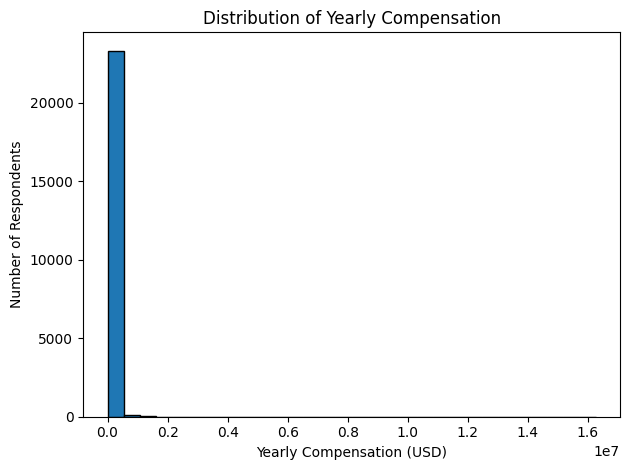

In [5]:
#Cleaning data
Converted_comp=df['ConvertedCompYearly'].dropna()

#plotting
plt.hist(Converted_comp, bins=30, edgecolor='black')  # histogram, not bar plot
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



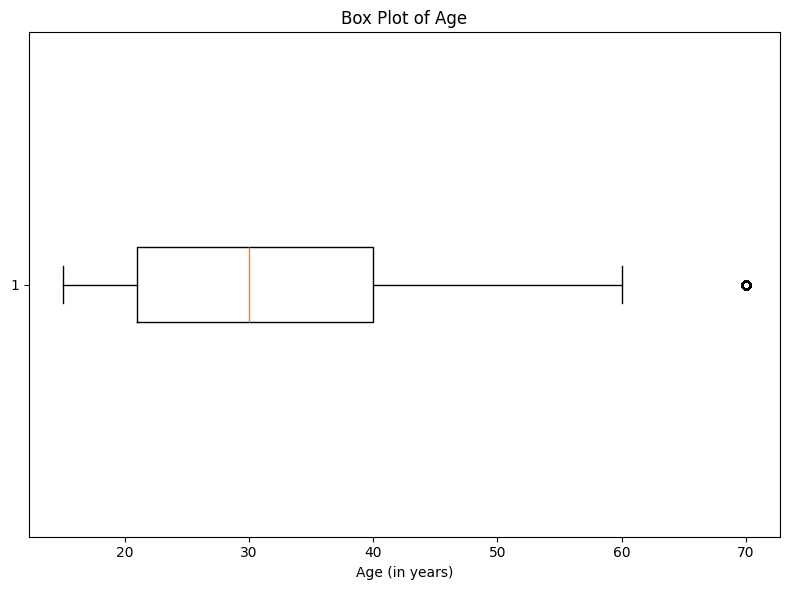

In [6]:
# Map age categories to numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop missing values
age_data = df['AgeNumeric'].dropna()

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age (in years)')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



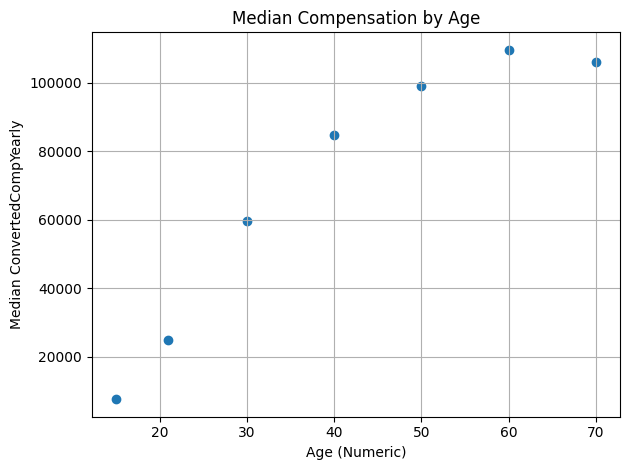

In [12]:
# Map age categories to numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop missing values
df_comp = df[['AgeNumeric', 'ConvertedCompYearly']].dropna()

#groupby
df_group = df_comp.groupby('AgeNumeric')['ConvertedCompYearly'].median()

# Plotting
plt.scatter(df_group.index, df_group.values)
plt.title('Median Compensation by Age')
plt.xlabel('Age (Numeric)')
plt.ylabel('Median ConvertedCompYearly')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


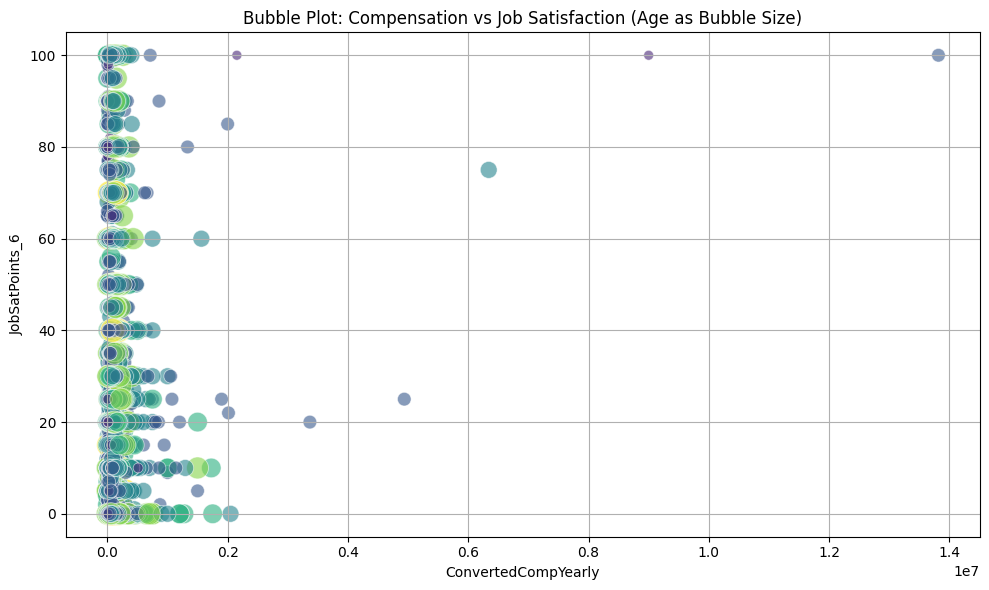

In [13]:
!pip install seaborn
import seaborn as sns

# Ensure required columns are present and clean the data
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

# Create the bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_bubble,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='AgeNumeric',
    hue='AgeNumeric',
    sizes=(20, 300),
    alpha=0.6,
    palette='viridis',
    legend=False
)

plt.title('Bubble Plot: Compensation vs Job Satisfaction (Age as Bubble Size)')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



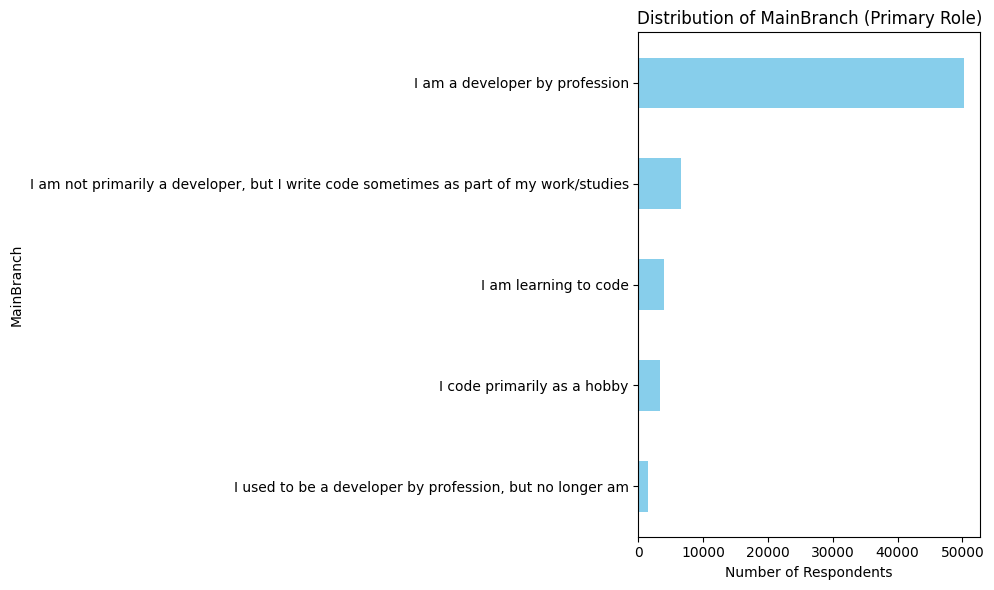

In [16]:
# Drop missing values and count occurrences
main_branch_counts = df['MainBranch'].dropna().value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Respondents')
plt.title('Distribution of MainBranch (Primary Role)')
plt.gca().invert_yaxis()  # Puts the most frequent role at the top
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



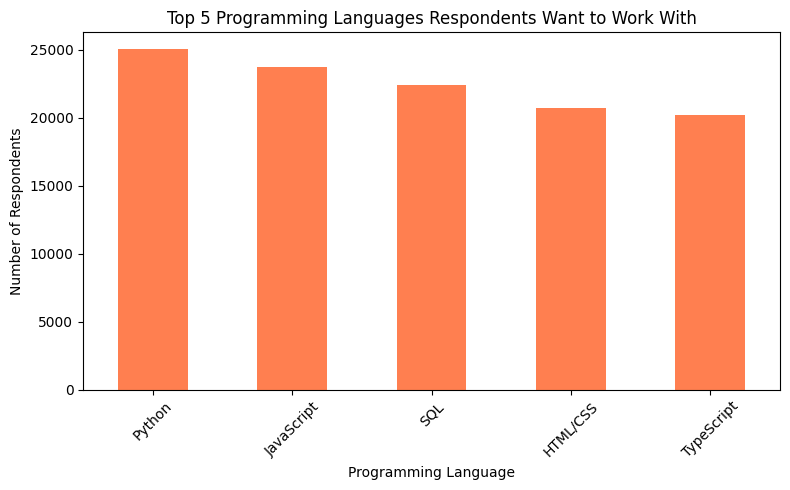

In [18]:
# Drop missing entries
df_lang = df['LanguageWantToWorkWith'].dropna()

# Flatten the semicolon-separated lists
lang_list = []
for entry in df_lang:
    lang_list.extend([lang.strip() for lang in entry.split(';')])

# Create a Series and count the top 5 languages
lang_series = pd.Series(lang_list)
top_5_langs = lang_series.value_counts().nlargest(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
top_5_langs.plot(kind='bar', color='coral')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


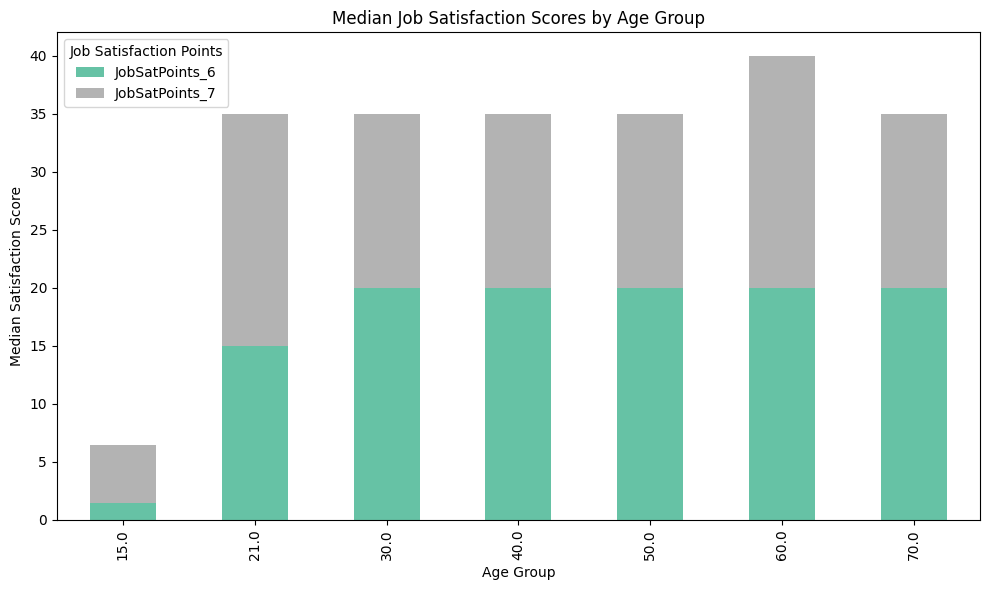

In [19]:
# Map Age categories to numeric midpoints for grouping
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Create AgeNumeric column
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in the columns of interest
plot_df = df[['AgeNumeric', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Group by AgeNumeric and compute medians
median_group = plot_df.groupby('AgeNumeric')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot stacked bar chart
median_group.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



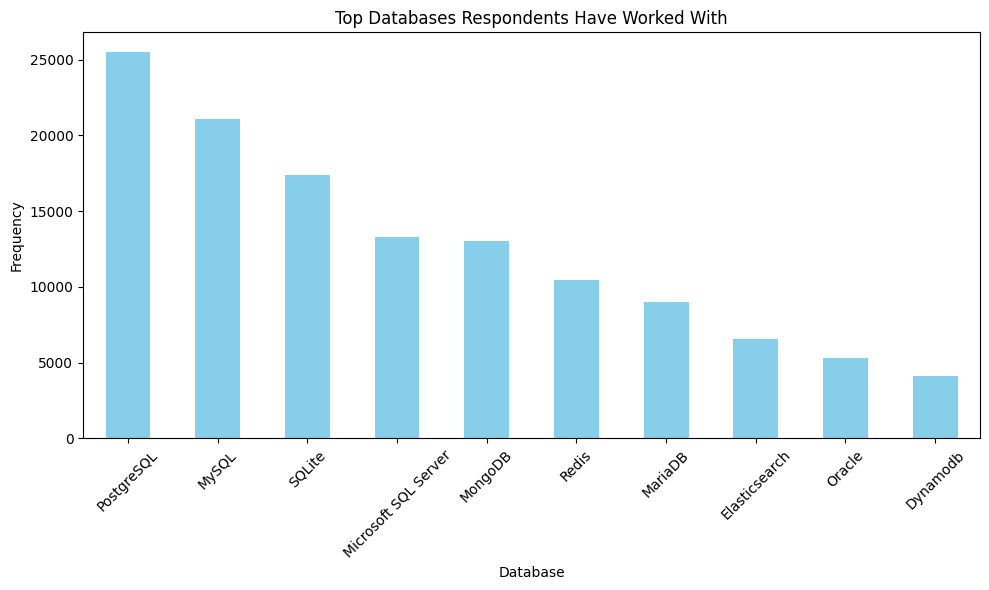

In [20]:
# Drop missing values
df_db = df['DatabaseHaveWorkedWith'].dropna()

# Flatten the semicolon-separated entries
all_dbs = []
for entry in df_db:
    all_dbs.extend([db.strip() for db in entry.split(';')])

# Create a Series and get value counts
db_series = pd.Series(all_dbs)
top_dbs = db_series.value_counts().nlargest(10)  # You can adjust number as needed

# Plot bar chart
top_dbs.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



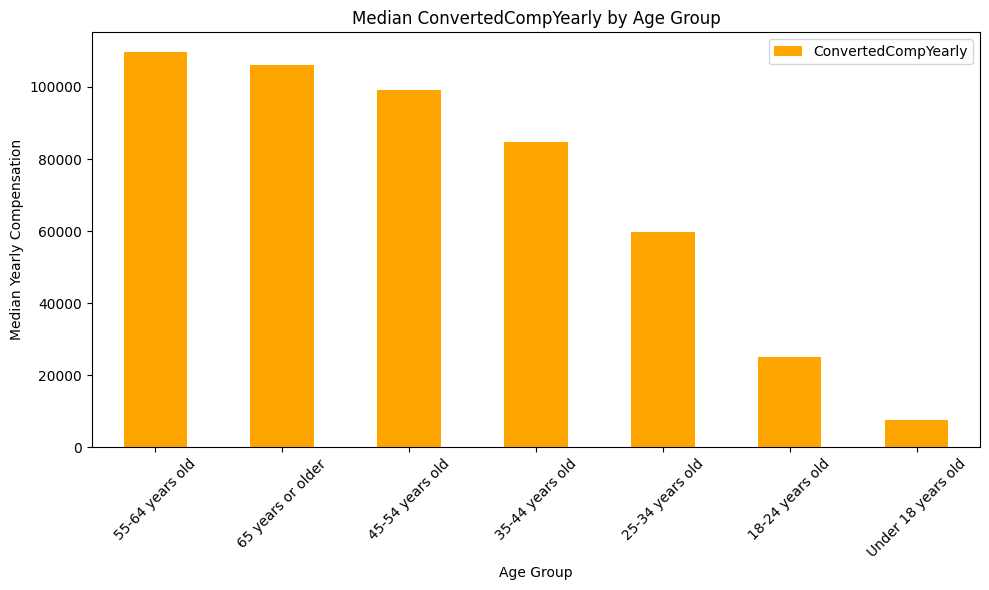

In [21]:
# Map Age categories to numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing compensation or age
df_comp_age = df[['Age', 'AgeNumeric', 'ConvertedCompYearly']].dropna()

# Group by age and calculate median compensation
median_comp_by_age = df_comp_age.groupby('Age')[['ConvertedCompYearly']].median().sort_values(by='ConvertedCompYearly', ascending=False)

# Plot
median_comp_by_age.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
